Try Grid Search on sklearn


In [6]:
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the Iris dataset
iris = datasets.load_iris()

# Define the parameter grid
parameters = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

# Define the model
svc = SVC()

# Create the GridSearchCV object
clf = GridSearchCV(svc, parameters)

# Fit the GridSearchCV object to the data
clf.fit(iris.data, iris.target)

# Output the best parameters
print(f"Best Parameters: {clf.best_params_}")

# Output the sorted cv_results_ keys
print(sorted(clf.cv_results_.keys()))

Best Parameters: {'C': 1, 'kernel': 'linear'}
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


torch


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size=4, hidden_size=10, output_size=3, lr=0.01, epochs=10, batch_size=16):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = SimpleNet(input_size, hidden_size, output_size)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model.train()
        for epoch in range(self.epochs):
            for batch_X, batch_y in loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'hidden_size': [5, 10, 20],
    'lr': [0.01, 0.001],
    'epochs': [10, 20],
    'batch_size': [16, 32]
}

# Create a PyTorchClassifier instance
pytorch_classifier = PyTorchClassifier(input_size=4, output_size=3)

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pytorch_classifier, param_grid=param_grid, cv=3, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ...batch_size=16, epochs=10, hidden_size=5, lr=0.01; total time=   0.0s
[CV] END ...batch_size=16, epochs=10, hidden_size=5, lr=0.01; total time=   0.0s
[CV] END ...batch_size=16, epochs=10, hidden_size=5, lr=0.01; total time=   0.0s
[CV] END ..batch_size=16, epochs=10, hidden_size=5, lr=0.001; total time=   0.0s
[CV] END ..batch_size=16, epochs=10, hidden_size=5, lr=0.001; total time=   0.0s
[CV] END ..batch_size=16, epochs=10, hidden_size=5, lr=0.001; total time=   0.0s
[CV] END ..batch_size=16, epochs=10, hidden_size=10, lr=0.01; total time=   0.0s
[CV] END ..batch_size=16, epochs=10, hidden_size=10, lr=0.01; total time=   0.0s
[CV] END ..batch_size=16, epochs=10, hidden_size=10, lr=0.01; total time=   0.0s
[CV] END .batch_size=16, epochs=10, hidden_size=10, lr=0.001; total time=   0.0s
[CV] END .batch_size=16, epochs=10, hidden_size=10, lr=0.001; total time=   0.0s
[CV] END .batch_size=16, epochs=10, hidden_size=

optim on: 

lr, epochs, optim, batch

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)


# Drop columns not in the list
data["explicit"] = data["explicit"].astype(int)


def find_min_max(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])

    # Find max and min values for each numeric column
    min_max_values = {}
    for col in numeric_cols.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        min_max_values[col] = {'min': min_value, 'max': max_value}

    return min_max_values


min_max_val = find_min_max(data)

y = data["hit"]
X = data.drop(columns=["hit", "song_popularity", "date", "name_x", "name_y", "song_id", "song_name", "artist1_id", "artist2_id", "song_type", "years_on_charts"])


def preprocess(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns

    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)     #questionable whether true or false

    encoded_columns = [col for col in df_encoded.columns if any(orig_col in col for orig_col in categorical_cols)]

    #print(categorical_cols)

    # Concatenate numerical and encoded categorical features
    df_processed = pd.concat([df_normalized, df_encoded[encoded_columns], df[exclude_cols]], axis=1)

    return df_processed



X_preprocessed = preprocess(X, min_max_val, exclude_cols=["release_date"])
X_preprocessed[X_preprocessed.select_dtypes(include=[bool]).columns] = X_preprocessed.select_dtypes(include=[bool]).astype(int)

# split_day = X["date"].iloc[-1] - pd.DateOffset(years=1)
# X_train = X[(X["date"] < split_day)].copy()
# X_test = X[(X["date"] >= split_day)].copy()
# 
# sep_index = X_train.shape[0]
# y_train = y.iloc[:sep_index].copy()
# y_test = y.iloc[sep_index:].copy()
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, shuffle=False)

feature_names = X_train.columns

In [76]:
from torch import nn
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MLPClassifier(nn.Module):
    def __init__(self, input_shape):
        super(MLPClassifier, self).__init__()
        self.input_shape = input_shape
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape[1], 128),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(128, 256),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(256, 512),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.ReLU(),
            #nn.Dropout(0.4),
            nn.Linear(64, 1)
        ).to(device)

    def forward(self, x):
        logits = self.layers(x)
        return torch.sigmoid(logits)


def load_model(model, path):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model {path} is loaded from epoch {checkpoint['epoch']} , loss {checkpoint['loss']}")
    return model

In [77]:
def upsampling(X_train, y_train):
    # Convert y_train to a numpy array
    # y_train = y_train.to_numpy()
    X_train = X_train.to_numpy()

    # Count the number of samples in each class
    class_counts = np.bincount(y_train.flatten().astype(int))
    max_count = class_counts.max()

    # Find indices of positive instances
    positive_indices = np.where(y_train.flatten() == 1)[0]

    # Calculate how many times to duplicate positive samples
    difference = max_count - class_counts[1]

    # Randomly select indices from positive instances
    random_indices = np.random.choice(positive_indices, size=difference, replace=True)

    # Get rows corresponding to positive instances
    rows_to_duplicate = np.vstack([X_train[idx] for idx in random_indices])

    # Stack duplicated rows with the original matrix
    X_train_upsampled = np.vstack([X_train, rows_to_duplicate])

    # Create an array of shape (x, 1) with all elements as 1
    rows_of_ones = np.ones((difference, 1))

    # Append rows_of_ones to original_array
    y_train_upsampled = np.concatenate((y_train, rows_of_ones), axis=0)

    print("######UPSAMPLING DONE######")
    return X_train_upsampled, y_train_upsampled

In [78]:
#X_train, y_train = upsampling(X_train, y_train.values.reshape(-1, 1))

In [79]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=["hit"])

In [80]:
X_train_upsampled_with_y = pd.concat([X_train_df, y_train_df], axis=1)
X_train_upsampled_with_y['date'] = pd.to_datetime(X_train_upsampled_with_y['release_date'])
X_train_upsampled_with_y.sort_values(by="date", inplace=True)
X_train_upsampled_with_y.drop(columns=["release_date", "date"], inplace=True)

# print(X_train_upsampled_with_y.head())
# prepro:
y_train_upsampled_ordered = X_train_upsampled_with_y["hit"]
X_train_upsampled_ordered = X_train_upsampled_with_y.drop(columns="hit")


In [81]:
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size=4, lr=0.01, epochs=10, batch_size=16):
        self.input_size = input_size
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = MLPClassifier(input_size)
        self.criterion = nn.BCELoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model.train()
        for epoch in range(self.epochs):
            for batch_X, batch_y in loader:
                self.optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs.data, 1)
        return predicted.numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


In [82]:
X_train_upsampled_ordered = X_train_upsampled_ordered.astype("float32")
#X_train_upsampled_ordered = X_train_upsampled_ordered.to_numpy()
y_train_upsampled_ordered = y_train_upsampled_ordered.to_frame()
y_train_upsampled_ordered = y_train_upsampled_ordered.astype("float32")
#y_train_upsampled_ordered = y_train_upsampled_ordered.to_numpy().reshape(-1, 1)

In [83]:
X_train_upsampled_ordered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683270 entries, 0 to 683433
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Cluster_x               683270 non-null  float32
 1   Cluster_y               683270 non-null  float32
 2   acousticness            683270 non-null  float32
 3   artist1_num             683270 non-null  float32
 4   artist2_num             683270 non-null  float32
 5   betweenesscentrality_x  683270 non-null  float32
 6   betweenesscentrality_y  683270 non-null  float32
 7   closnesscentrality_x    683270 non-null  float32
 8   closnesscentrality_y    683270 non-null  float32
 9   clustering_x            683270 non-null  float32
 10  clustering_y            683270 non-null  float32
 11  danceability            683270 non-null  float32
 12  degree_x                683270 non-null  float32
 13  degree_y                683270 non-null  float32
 14  duration_ms             6

In [84]:
X_train_upsampled_ordered = X_train_upsampled_ordered.to_numpy()

In [85]:
y_train_upsampled_ordered = y_train_upsampled_ordered.to_numpy().reshape(-1, 1)

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    #'hidden_size': [5, 10, 20],
    #optim
    'lr': [0.01, 0.001, 0.0001],
    'epochs': [20],
    'batch_size': [64, 128, 256]
}

# Create a PyTorchClassifier instance
pytorch_classifier = PyTorchClassifier(input_size=list(X_train_upsampled_ordered.shape))

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pytorch_classifier, param_grid=param_grid, cv=1, verbose=2)

# Fit the model
grid_search.fit(X_train_upsampled_ordered, y_train_upsampled_ordered)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test.to_numpy(), y_test.to_numpy)
print("Test Score:", test_score)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .................batch_size=256, epochs=10, lr=0.01; total time= 3.5min
[CV] END .................batch_size=256, epochs=10, lr=0.01; total time= 3.6min
[CV] END .................batch_size=256, epochs=10, lr=0.01; total time= 3.5min
[CV] END ................batch_size=256, epochs=10, lr=0.001; total time= 3.5min
[CV] END ................batch_size=256, epochs=10, lr=0.001; total time= 3.8min
[CV] END ................batch_size=256, epochs=10, lr=0.001; total time= 3.8min
[CV] END .................batch_size=256, epochs=20, lr=0.01; total time= 8.2min
[CV] END .................batch_size=256, epochs=20, lr=0.01; total time= 9.9min
[CV] END .................batch_size=256, epochs=20, lr=0.01; total time= 8.8min
[CV] END ................batch_size=256, epochs=20, lr=0.001; total time=11.2min
[CV] END ................batch_size=256, epochs=20, lr=0.001; total time= 8.8min
[CV] END ................batch_size=256, epochs=2

ValueError: could not determine the shape of object type 'DataFrame'

In [90]:
X_test.drop(columns="release_date", inplace=True)

In [92]:
y_test

683434    0.0
683435    0.0
683436    0.0
683437    0.0
683438    0.0
         ... 
911001    1.0
911000    1.0
911025    1.0
911012    1.0
911026    1.0
Name: hit, Length: 227757, dtype: float64

In [94]:
X_test_np, y_test_np = X_test.to_numpy(), y_test.to_numpy()
test_score = best_model.score(X_test_np, y_test_np)
print("Test Score:", test_score)

y_pred = best_model.predict(X_test_np)
print(classification_report(y_test_np, y_pred))

Test Score: 0.9906654899739635


C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    225631
         1.0       0.00      0.00      0.00      2126

    accuracy                           0.99    227757
   macro avg       0.50      0.50      0.50    227757
weighted avg       0.98      0.99      0.99    227757


C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lasse\anaconda3\envs\Ba_first_tries\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


no upsampling because it leads to leakage

In [ ]:
nsodkapüskdsä

on ds for real

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

data = pd.read_csv("data_superstar_v1_0.csv", delimiter=",")
data['date'] = pd.to_datetime(data['release_date'])
data.sort_values(by="date", inplace=True)


# Drop columns not in the list
data["explicit"] = data["explicit"].astype(int)


def find_min_max(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])

    # Find max and min values for each numeric column
    min_max_values = {}
    for col in numeric_cols.columns:
        min_value = df[col].min()
        max_value = df[col].max()
        min_max_values[col] = {'min': min_value, 'max': max_value}

    return min_max_values


min_max_val = find_min_max(data)

y = data["hit"]
X = data.drop(columns=["hit", "song_popularity", "date", "name_x", "name_y", "song_id", "song_name", "artist1_id", "artist2_id", "song_type"])#, "years_on_charts"])


def preprocess(df, min_max_values, exclude_cols=None):
    missing_numerical = df.select_dtypes(include=['number']).isnull().sum()
    # Fill missing values with mean for each numeric attribute
    imputer = SimpleImputer(strategy='mean')
    df_filled = df.copy()
    for col in missing_numerical.index:
        if missing_numerical[col] > 0:
            df_filled[col] = imputer.fit_transform(df[[col]])

    # Normalize numerical features into [0, 1] range with MinMaxScaler
    if exclude_cols:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns.difference(exclude_cols)
    else:
        numerical_cols = df_filled.select_dtypes(include=['number']).columns

    # print("numerical columns:", numerical_cols)

    for column_name in numerical_cols:
        df_filled[column_name] = (df_filled[column_name] - min_max_values[column_name]["min"]) / (
                min_max_values[column_name]["max"] - min_max_values[column_name]["min"])

    df_normalized = pd.DataFrame(df_filled, columns=numerical_cols)

    if exclude_cols:
        categorical_cols = df.select_dtypes(include=['object']).columns.difference(exclude_cols)
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns

    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)     #questionable whether true or false

    encoded_columns = [col for col in df_encoded.columns if any(orig_col in col for orig_col in categorical_cols)]

    #print(categorical_cols)

    # Concatenate numerical and encoded categorical features
    df_processed = pd.concat([df_normalized, df_encoded[encoded_columns], df[exclude_cols]], axis=1)

    return df_processed



X_preprocessed = preprocess(X, min_max_val, exclude_cols=["release_date"])
X_preprocessed[X_preprocessed.select_dtypes(include=[bool]).columns] = X_preprocessed.select_dtypes(include=[bool]).astype(int)

# split_day = X["date"].iloc[-1] - pd.DateOffset(years=1)
# X_train = X[(X["date"] < split_day)].copy()
# X_test = X[(X["date"] >= split_day)].copy()
# 
# sep_index = X_train.shape[0]
# y_train = y.iloc[:sep_index].copy()
# y_test = y.iloc[sep_index:].copy()
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.25, shuffle=False)

feature_names = X_train.columns

In [118]:
X_train, y_train = upsampling(X_train, y_train.values.reshape(-1, 1))

######UPSAMPLING DONE######


In [119]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=["hit"])

In [120]:
X_train_upsampled_with_y = pd.concat([X_train_df, y_train_df], axis=1)
X_train_upsampled_with_y['date'] = pd.to_datetime(X_train_upsampled_with_y['release_date'])
X_train_upsampled_with_y.sort_values(by="date", inplace=True)
X_train_upsampled_with_y.drop(columns=["release_date", "date"], inplace=True)

# print(X_train_upsampled_with_y.head())
# prepro:
y_train_upsampled_ordered = X_train_upsampled_with_y["hit"]
X_train_upsampled_ordered = X_train_upsampled_with_y.drop(columns="hit")

In [121]:
X_train_upsampled_ordered = X_train_upsampled_ordered.astype("float32")
#X_train_upsampled_ordered = X_train_upsampled_ordered.to_numpy()
y_train_upsampled_ordered = y_train_upsampled_ordered.to_frame()
y_train_upsampled_ordered = y_train_upsampled_ordered.astype("float32")
#y_train_upsampled_ordered = y_train_upsampled_ordered.to_numpy().reshape(-1, 1)

In [122]:
X_train = X_train_upsampled_ordered
y_train = y_train_upsampled_ordered

In [123]:
X_test.drop(columns="release_date", inplace=True)

In [124]:
from torch.utils.data import TensorDataset, DataLoader

# convert to Pytorch tensor
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
print("######CONVERSION TO TENSOR######")

# Move the data to the GPU if available
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

######CONVERSION TO TENSOR######


In [125]:
# define model
print(X_train.size())
model = MLPClassifier(X_train.size()).to(device)

# Define loss function and optimizer (same as TensorFlow example)
loss_fn = nn.BCELoss()  # alternative #BCELoss(weights=weights)#nn.MSELoss()
loss_fn_mae = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#, weight_decay=0.001) # l2 reg
#l1_penalty = torch.nn.L1Loss(size_average=False)

# Create DataLoader with oversampled data
dataset_train = TensorDataset(X_train, y_train)
trainloader = DataLoader(dataset_train, batch_size=256, shuffle=True)#, num_workers=2)#, num_workers=2, pin_memory=True) #last two are new look at later
dataset_test = TensorDataset(X_test, y_test)
val_loader = DataLoader(dataset_test, batch_size=256, shuffle=False)#, num_workers=2)

# Training loop
train_losses = []
val_losses = []
val_accs = []
val_prec = []
epochs = 10
best_val_loss = 1e8
best_val_acc = 0
best_precision = 0
best_prec_acc = 0.0
version = "v3_try_reg"

lambda1 = 0.001  # L1 penalty strength
nweights = 0
for name,weights in model.named_parameters():
    if 'bias' not in name:
        nweights = nweights + weights.numel()
print(f'Total number of weights in the model = {nweights}')

for epoch in range(epochs):  # Adjust epochs as needed
    epoch_train_loss = 0.0
    epoch_val_loss = 0.0

    # Initialize counts for each class

    # Training phase
    model.train()  # Set model to training mode
    for X_batch, y_batch in trainloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        # Forward pass
        y_pred = model(X_batch)
        # print("y_batch: ", y_batch)
        # print("y_pred: ", y_pred)
        #print(y_batch.shape)
        y_batch = y_batch.reshape(-1, 1)
        #print(y_batch.shape)
        loss = loss_fn(y_pred, y_batch)
        #l1_norm = 0
        #for param in model.parameters():
        #    l1_norm += l1_penalty(param)
        #l2_norm = sum(torch.square(param) for param in model.parameters())
        #l1_norm = sum(param.abs().sum() for param in model.parameters())
        #l2_norm = sum(param.pow(2).sum() for param in model.parameters())        
        #l1_penalty_var = lambda1 * l1_norm #+ lambda2 * l2_norm
        #total_loss = loss + l1_penalty_var
        L1_term = torch.tensor(0., requires_grad=True)
        for name, weights in model.named_parameters():
            if 'bias' not in name:
                weights_sum = torch.sum(torch.abs(weights))
                L1_term = L1_term + weights_sum
        L1_term = L1_term / nweights

        # l2_weight = 0.001
        # l2_parameters = []
        # for parameter in model.parameters():
        #     l2_parameters.append(parameter.view(-1))
        # l2 = l2_weight * torch.square(torch.cat(l2_parameters)).sum()

        # Regularize loss using L1 regularization
        total_loss = loss #+ L1_term * lambda1 #+ l2 # -  ?

        # Backward pass and optimize
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        epoch_train_loss += total_loss.item()
    # Calculate average epoch training loss
    avg_epoch_train_loss = epoch_train_loss / len(trainloader)
    train_losses.append(avg_epoch_train_loss)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        correct, total = 0.0, 0.0
        tp, fp =  0.0, 0.0
        loss_step = []
        for data in val_loader:
            inp_data, labels = data
            inp_data = inp_data.to(device)
            labels = labels.to(device)
            outputs = model(inp_data)
            labels = labels.reshape(-1, 1)
            val_loss = loss_fn(outputs, labels)
            predicted = outputs.round()
            total += labels.size(0)
            correct += (predicted == labels).sum()
            loss_step.append(val_loss.item())
            #print(labels.shape)
            #print(predicted.shape)
            tp  += ((labels == 1) & (1 == predicted)).sum().item()
            fp += ((labels == 0) & (1 == predicted)).sum().item()
        # dont forget to take the means here
        epoch_val_acc = (correct / total).cpu().numpy()
        epoch_val_loss = torch.tensor(loss_step).mean().numpy()
        #print('TP:', tp, 'FP:', fp)
        epoch_val_prec = tp / (tp + fp) if tp + fp > 0 else 0

        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
            }, f'best_torch_{version}_model_min_val_loss.pth')
        if epoch_val_acc > best_val_acc:
            best_val_acc = epoch_val_acc
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
            }, f'best_torch_{version}_model_max_val_acc.pth')
        if epoch_val_prec > best_precision or (epoch_val_acc > best_prec_acc and best_precision == epoch_val_prec):
            best_precision = epoch_val_prec
            best_prec_acc = epoch_val_acc
            torch.save({
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_val_loss,
                'precision': best_precision,
            }, f"best_torch_{version}_model_max_val_prec.pth")

        val_prec.append(epoch_val_prec)
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)
        print(
            f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_epoch_train_loss:.4f}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_acc:.4f}, Validation Precision: {epoch_val_prec:.4f}")

print("######TRAINING DONE######")


def load_model(model, path):
    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    print(f"Model {path} is loaded from epoch {checkpoint['epoch']} , loss {checkpoint['loss']}")
    return model


print("######LOAD MODEL######")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(X_train.size())
model = load_model(model, f"best_torch_{version}_model_max_val_prec.pth")
model = model.to(device)
model.eval()

torch.Size([1346874, 71])
Total number of weights in the model = 345024
Epoch [1/10], Training Loss: 0.1131, Validation Loss: 0.0364, Validation Accuracy: 0.9964, Validation Precision: 0.7731
Epoch [2/10], Training Loss: 0.0836, Validation Loss: 0.1551, Validation Accuracy: 0.9912, Validation Precision: 0.5170
Epoch [3/10], Training Loss: 0.0809, Validation Loss: 0.0544, Validation Accuracy: 0.9943, Validation Precision: 0.6451
Epoch [4/10], Training Loss: 0.0924, Validation Loss: 0.0664, Validation Accuracy: 0.9938, Validation Precision: 0.6228
Epoch [5/10], Training Loss: 0.0917, Validation Loss: 0.0392, Validation Accuracy: 0.9957, Validation Precision: 0.7388
Epoch [6/10], Training Loss: 0.0967, Validation Loss: 0.1815, Validation Accuracy: 0.9816, Validation Precision: 0.3212
Epoch [7/10], Training Loss: 0.0785, Validation Loss: 0.1090, Validation Accuracy: 0.9946, Validation Precision: 0.6612
Epoch [8/10], Training Loss: 0.0859, Validation Loss: 0.0968, Validation Accuracy: 0.987

MLPClassifier(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=71, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): ReLU()
    (7): Linear(in_features=512, out_features=256, bias=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=64, bias=True)
    (12): ReLU()
    (13): Linear(in_features=64, out_features=1, bias=True)
  )
)

######LOSS PLOT DONE######
optimal threshold 1.0, with precision 0.9872080088987765
######CONFUSION MATRIX PLOT DONE######
True Negatives (TN): 225511
False Positives (FP): 120
False Negatives (FN): 303
True Positives (TP): 1823
Precision: 0.9382398353062275
Recall: 0.8574788334901223
F1-Score: 0.8960432538707299
ROC AUC: 0.9284734958388027
######ROC-AUC PLOT DONE######
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    225631
         1.0       0.94      0.86      0.90      2126

    accuracy                           1.00    227757
   macro avg       0.97      0.93      0.95    227757
weighted avg       1.00      1.00      1.00    227757
Weighted Accuracy: 0.9888429202855764
Macro F1 Score: 0.9475531313268191


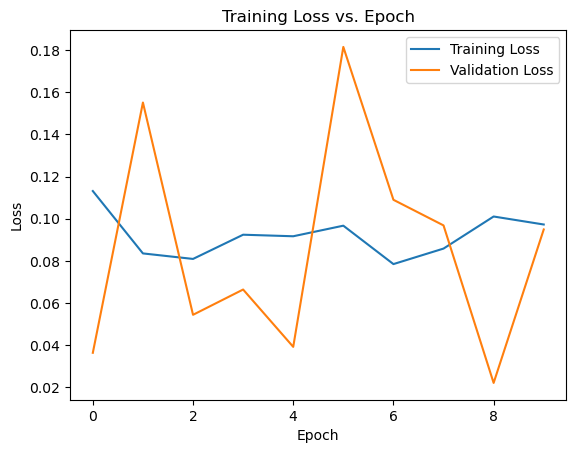

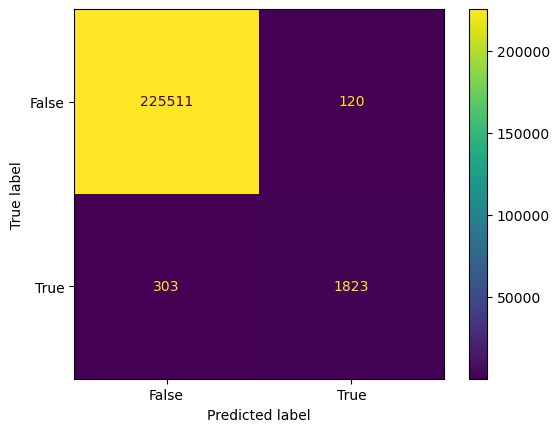

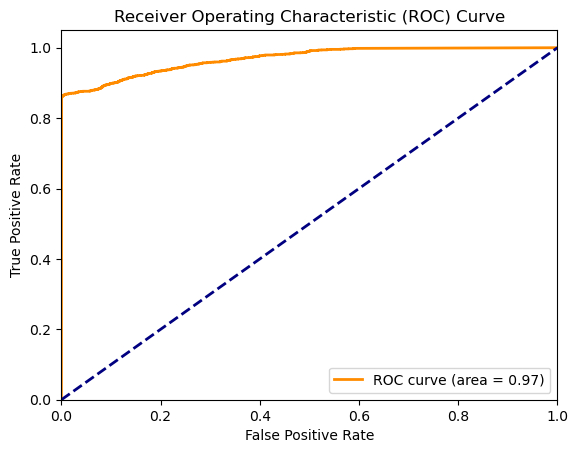

In [126]:
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epoch')
plt.legend()
plt.savefig(f"losses_pytorch_{version}.png")
print("######LOSS PLOT DONE######")

# Calculate confusion matrix
output = model(X_test)
# print("output", output)

opt_thres = -1
opt_prec = 0
liste_thresh = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
true_labels = y_test.int().tolist()
# print(output.tolist())
for i in liste_thresh:
    flattened_list = [item for sublist in output.tolist() for item in sublist]
    predictions = list(map(lambda x: int(x >= i), flattened_list))

    precision = metrics.precision_score(true_labels, predictions)

    # Recall
    recall = metrics.recall_score(true_labels, predictions)
    # F1-Score
    f1 = metrics.f1_score(true_labels, predictions)
    # ROC Curve and AUC
    fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    # print("Precision:", precision)
    # print("Recall:", recall)
    # print("F1-Score:", f1)
    # print("ROC AUC:", roc_auc)

    if precision > opt_prec:
        opt_thres = i
        opt_prec = precision
print(f"optimal threshold {opt_thres}, with precision {opt_prec}")

predictions = output.round().int().tolist()  # Converting tensor to list of integers
true_labels = y_test.int().tolist()  # Converting tensor to list of integers

confusion_matrix = metrics.confusion_matrix(true_labels, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()
plt.savefig(f"Confusion_Matrix_pytorch_{version}.png")
print("######CONFUSION MATRIX PLOT DONE######")

# Extract TN, FP, TP values
TN = confusion_matrix[0, 0]  # True Negatives
FP = confusion_matrix[0, 1]  # False Positives
FN = confusion_matrix[1, 0]  # False Negatives
TP = confusion_matrix[1, 1]  # True Positives

# Print the results
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

# Precision 
precision = metrics.precision_score(true_labels, predictions)
# Recall 
recall = metrics.recall_score(true_labels, predictions)
# F1-Score 
f1 = metrics.f1_score(true_labels, predictions)
# ROC Curve and AUC 
fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions)
roc_auc = metrics.auc(fpr, tpr)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)

# print(output.device)
output_cpu = output.cpu().detach().numpy()

fpr, tpr, thresholds = metrics.roc_curve(y_test.tolist(), output_cpu.tolist())
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig(f"ROC_AUC_pytorch_{version}.png")
print("######ROC-AUC PLOT DONE######")

# Generate a classification report
class_report = classification_report(y_test.tolist(), predictions)
print("Classification Report:\n", class_report)

y_test_cpu = y_test.cpu()
y_test_list = y_test_cpu.tolist()

# Convert predictions to list
predictions_list = list(np.hstack(predictions))

y_test_series = pd.Series(list(np.hstack(y_test_list)))
count_occ = y_test_series.value_counts(normalize=True)

# Calculate the weighted accuracy
weighted_acc = (np.sum((y_test_series == 1) == predictions_list) * count_occ[0] + np.sum(
    (y_test_series == 0) == predictions_list) * count_occ[1]) / len(y_test_list)

print("Weighted Accuracy:", weighted_acc)

macro_f1 = metrics.f1_score(true_labels, predictions, average='macro')

print("Macro F1 Score:", macro_f1)